In [2]:
import datascience
import numpy as np
import graphviz

from datascience import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 


from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support

import pandas as pd
import numpy as np


import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

In [4]:
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  """Entry point for launching an IPython kernel.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/My\ Drive/DS200Labs/

'???'					    IMDB5000movies.csv
 BC_10_2				   '???.pdf'
 BC_10_2.pdf				    player_data
 Ben-NE-9-10-2015-pass-6.csv		    player_data.csv
 Ben_pass_5_2				    player_data.pdf
 Ben_pass_5_2.pdf			    salary_data.csv
 breast-cancer-wisconsin-data-windCSV.csv   SFSalaries2011_2014.csv
 BreatCancerFinal.csv			    Tweets
 faithful.csv


In [ ]:
path= "/content/drive/My Drive/DS200Labs/BreatCancerFinal.csv"
BC_table = Table.read_table(path)
BC_table.show(5)

radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,classification
17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,1
20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902,1
19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,1
11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,1
20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678,1


In [ ]:
BC_feature_names= BC_table.labels
print(BC_feature_names)
BC_table.num_columns

('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'classification')


31

In [ ]:
# Because the last column is 'classification', which is NOT a feture, but the model's prediction variable, therefore we need to extract the first 30 columns as the list of feature names.
BC_feature_names = BC_feature_names[0:30]
print(BC_feature_names)

('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst')


In [ ]:
# Convert the Breast Cancer Final Table to a Data Frame using .to_df method of Tables in datascience module.
BC_DF= BC_table.to_df()

In [ ]:
BC_features = BC_DF.values[:, 0:30]
print(BC_features)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.405e+01 2.715e+01 9.138e+01 ... 1.048e-01 2.250e-01 8.321e-02]
 [1.120e+01 2.937e+01 7.067e+01 ... 0.000e+00 1.566e-01 5.905e-02]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [ ]:
BC_classification = BC_DF.values[:, 30]
print(BC_classification)
type(BC_classification)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

numpy.ndarray

In [ ]:
# Print the total number of labelled data. This way, we can double check the number of training and testing in each fold is correct.
print('Size of Labelled Data: ', len(BC_classification))

Size of Labelled Data:  569


# Exercise 1 (5 points)
Complete the following code to choose the number of k in StratifiedKFold.  Suggestion: 5 or 10.

In [ ]:
# Use Stratified Kfold Cross Validation so that
#   each fold contains the same ratio of positive/negative instances
k = 10
skf = StratifiedKFold(n_splits= k , random_state=123, shuffle= True)

# Exercise 2 (5 points)
Complete the following code to specify the range of max_depth, which we will use later in this lab for finding the best max_depth using Stratified Kfold Cross Validation.

In [ ]:
### Set the range of max_depth for finding the best max_depth for this problem
low_max_depth = 1
high_max_depth = 12
training_performance_table = np.empty( [high_max_depth+1, k+1, 5] )
testing_performance_table = np.empty( [high_max_depth+1, k+1, 5] )

# Exercise 3 (10 points)
Complete the following code to specify 
- The random_state (an integer) for creating Decision Trees
- The parameters for clf.fit (the first parameter is the input features of the training data, and the second parameter is the desired/actual classifications output of the training data)

Execute the code, which iterates over different max_depth choices. For each max_depth choice, there is another for
loop that performs stratified k-fold cross validation to
compute k f1 measures, one for each fold. The f1 measure for
training data is stored in the training_performance_table, and the f1 measure for testing data is stored in the testing_performance_table.

In [ ]:
X = BC_features
y = BC_classification

for depth in range(low_max_depth, high_max_depth+1):

    fold = 0

    for train_index, test_index in skf.split(X, y):
        print("Fold Number:", fold+1)
        #print("Training Data Index:", train_index)
        #print("Testing Data Index:", test_index)  
    
        x_train= X[train_index]    
        # print("Training Data:", x_train)
        y_train= y[train_index]
        #print("Training Data Target Output:", y_train)
        x_test= X[test_index]
        # print("Testing Data:", x_test)
        y_test= y[test_index]
        #print("Testing Data Target Output:", y_test)
    
        clf = tree.DecisionTreeClassifier(criterion='entropy', random_state = 1234, max_depth=depth, \
                                  min_samples_leaf =2)
    
        clf.fit(x_train, y_train)
    
        ### Use the model generated to predict for training data
        predicted_training_y = clf.predict(x_train)
    
        train_p = metrics.precision_score(y_train, predicted_training_y)
        train_r = metrics.recall_score(y_train, predicted_training_y)
        train_f1= metrics.f1_score(y_train, predicted_training_y)
        training_performance_table[depth, fold, 0]=depth
        training_performance_table[depth, fold, 1]=train_p
        training_performance_table[depth, fold, 2]=train_r
        training_performance_table[depth, fold, 3]=train_f1
        print("Max depth is ", depth, "Prediction Performance for Training Data f1:", train_f1)

        ### Use the model generated to predict for testint data
        predicted_testing_y = clf.predict(x_test)
    
        test_p= metrics.precision_score(y_test, predicted_testing_y)
        test_r= metrics.recall_score(y_test, predicted_testing_y)
        test_f1 = metrics.f1_score(y_test, predicted_testing_y)
        testing_performance_table[depth, fold, 0]=depth
        testing_performance_table[depth, fold, 1]=test_p
        testing_performance_table[depth, fold, 2]= test_r
        testing_performance_table[depth, fold, 3]= test_f1
        print("Prediction Performance for Testing Data f1:", test_f1)
    
        fold=fold+1
    


Fold Number: 1
Max depth is  1 Prediction Performance for Training Data f1: 0.8975069252077563
Prediction Performance for Testing Data f1: 0.8292682926829269
Fold Number: 2
Max depth is  1 Prediction Performance for Training Data f1: 0.8908045977011495
Prediction Performance for Testing Data f1: 0.7999999999999999
Fold Number: 3
Max depth is  1 Prediction Performance for Training Data f1: 0.903061224489796
Prediction Performance for Testing Data f1: 0.7500000000000001
Fold Number: 4
Max depth is  1 Prediction Performance for Training Data f1: 0.8925619834710744
Prediction Performance for Testing Data f1: 0.8717948717948718
Fold Number: 5
Max depth is  1 Prediction Performance for Training Data f1: 0.8951406649616369
Prediction Performance for Testing Data f1: 0.888888888888889
Fold Number: 6
Max depth is  1 Prediction Performance for Training Data f1: 0.8928571428571429
Prediction Performance for Testing Data f1: 0.9047619047619048
Fold Number: 7
Max depth is  1 Prediction Performance 

### Calculate Average, Minimum, and Maximum f1 score across folds 
The first dimension of training_performance_table refers to a specific max_depth value.
The second dimension of training_performance_table refers to the number of a fold (in a Stratified k-fold).
The third dimension of training_performance_table saves f1 score in index "3".

For example, the code below returns an array of f1_score for all k folds for max_depth set to 3.

In [ ]:
f1_array=training_performance_table[3, 0:k:1, 3]
print(f1_array)

[0.96476965 0.94214876 0.97082228 0.96476965 0.95978552 0.95360825
 0.94845361 0.9516129  0.95934959 0.96476965]


#### Numpy offers a convenient way to calculate the average, the minimum, and the maximum value of a given array:
    np.average returns the average of a given array
    np.amin returns the minimum value of a given array
    np.amax regturns the maximum value of a given array

In [ ]:
np.average(f1_array)

0.9580089859767165

In [ ]:
np.amin(training_performance_table[7, 1:k+1:1, 3])

6.9229178463105e-310

In [ ]:
np.amax(training_performance_table[7, 1:k+1:1, 3])

0.9973753280839895

### We want to calculate the average performance across all folds for each max_depth so that we can compare them. We use an array
```
cv_training_f1_summary[ depth, performance]
```
to store the average, minimum, and maximum f1 score for training data across all k folds for each max_depth choice.  For simplicity, we use a 2-dimensional array to record these performance summary based
on k-fold Cross Validation.  The first dimension of the array is max_depth, and the second dimensiuon of the array stores average,
minimu, and maximum as follows:
0: average f1 score 
1: minimum f1 score
2: maximum f1 score

Similarily, we use the array
```
cv_testing_f1_summary[ depth, performance ] 
```
to store the average, minimum, and maximum f1 score for testing data across all k folds for each max_depth choice.

In [ ]:
cv_training_f1_summary = np.empty( [high_max_depth+1, 3])
cv_testing_f1_summary = np.empty( [high_max_depth+1, 3])
first_fold = 0
last_fold = k
for depth in range(low_max_depth, high_max_depth+1):
    train_f1_array = training_performance_table[depth, first_fold:last_fold:1 , 3]
    cv_training_f1_summary[depth, 0] = np.average(train_f1_array)
    cv_training_f1_summary[depth, 1] = np.amin(train_f1_array)
    cv_training_f1_summary[depth, 2] = np.amax(train_f1_array)
    test_f1_array = testing_performance_table[depth, first_fold:last_fold:1, 3]
    cv_testing_f1_summary[depth, 0] = np.average(test_f1_array)
    cv_testing_f1_summary[depth, 1] = np.amin(test_f1_array)
    cv_testing_f1_summary[depth, 2] = np.amax(test_f1_array)

### We want to plot the average of f1 scores (across all k folds) for each max_depth, and compare the average of f1 scores for training data and testing data

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

In [ ]:
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  """Entry point for launching an IPython kernel.


In [ ]:
depth=np.linspace(low_max_depth, high_max_depth, high_max_depth-low_max_depth+1)
print(depth)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


In [ ]:
avg_f1_training = cv_training_f1_summary[low_max_depth:high_max_depth+1, 0]
min_f1_training = cv_training_f1_summary[low_max_depth:high_max_depth+1, 1]
avg_f1_testing = cv_testing_f1_summary[low_max_depth:high_max_depth+1, 0]
min_f1_testing = cv_testing_f1_summary[low_max_depth:high_max_depth+1, 1]

# Exercise 4 (10 points)
Complete the following code for plotting average f1 training (across k folds) and
average f1 testing. Make sure you enter the correct variable for the lable corresponding to the correct performance. For example, the training_avg_lable should be used for the plot of avg_f1_training.

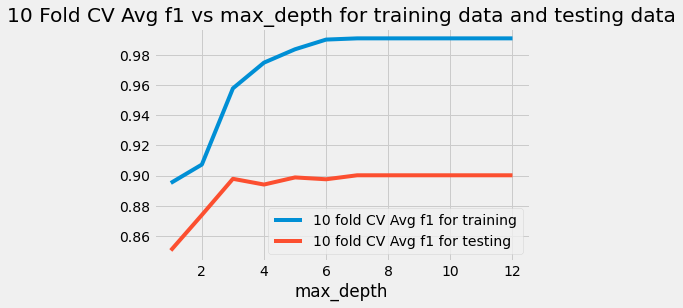

In [ ]:
training_avg_lable= str(k) + " fold CV Avg f1 for training"
testing_avg_lable = str(k) + " fold CV Avg f1 for testing"
plt.plot(depth, avg_f1_training, label= training_avg_lable)
plt.plot(depth, avg_f1_testing, label= testing_avg_lable)
plt.xlabel('max_depth')
title= str(k) + ' Fold CV Avg f1 vs max_depth for training data and testing data'
plt.title(title)
plt.legend()
plt.show()

# Exercise 5 (10 points)
Complete the following code to plot both the average f1 and the minimum f1 across k folds for both the training data and the testing data.  Make sure you enter the correct variable for the correct label. 

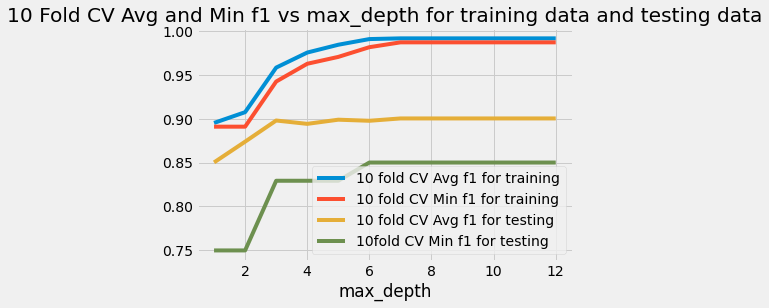

In [ ]:
training_min_lable = str(k)+ " fold CV Min f1 for training"
testing_min_lable = str(k) + "fold CV Min f1 for testing"
title2= str(k) + " Fold CV Avg and Min f1 vs max_depth for training data and testing data"
plt.plot(depth, avg_f1_training, label= training_avg_lable)
plt.plot(depth, min_f1_training, label= training_min_lable)
plt.plot(depth, avg_f1_testing, label= testing_avg_lable)
plt.plot(depth, min_f1_testing, label= testing_min_lable)
plt.xlabel('max_depth')
plt.title(title2)
plt.legend()
plt.show()

# Exercise 6 (15 points)
Answer the following questions:
- (a) What is the best max_depth for breast cancer diagnosis decision tree? Explain the rationale of your answer. (10 points)
- (b) In general, if you observe avg f1 does not increase and min f1 decreases as max_depth increases, what does this mean in terms of overfitting risk? (5 points)

# Answer to Exercise 6 
- (a) The best max_depth would be 8 I think. This is where all the data plateaus.
- (b) This means overfitting risk goes up.

# Exercise 7 (10 points)
Compare the result of using one-time train test split (Lab 7) to choose max_depth versus the result of using Stratified k-fold Cross Validation to choose the max_depth.  What is the benefit of the latter approach?

# Answer for Exercise 7
The latter approach is more accurate. The method used in Lab 7 is easier, but less accurate. Having a range for max depth is easier to establish, but creates a less accurate result.
